In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, TargetEncoder, OrdinalEncoder, OneHotEncoder

In [135]:
# Importing the dataset:
column_names = ['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income']

df = pd.read_csv('adult.csv', skipinitialspace=True)
df_test = pd.read_csv('adult.test.csv', header=None, names=column_names, skipinitialspace=True)

# We do't need final weight feature for model training, so it will be dropped
df = df.drop('Final Weight', axis=1)
df_test = df_test.drop('Final Weight', axis=1)

print(df.shape)
print(df_test.shape)

# Let's drop duplicates from the dataframe
df = df.drop_duplicates()
df_test.drop_duplicates()

# Defining numerical and categorical features
numerical_cols = ["Age", "Capital Gain", "capital loss", "Hours per Week", "EducationNum"]
categorical_cols = ["Education", "Workclass", "Relationship", "Occupation", "Marital Status", "Gender", "Race", "Native Country"]

# Let's look at the structure of categorical features:
for column in categorical_cols:
    print(df[column].value_counts(dropna=False).to_frame())

# Featues "Workclass", "Occupation" and "Native Country" have missing values, so we are dropping them:

def drop_missing_vals(dframe, column):
    dframe_cleaned = dframe.drop(dframe[dframe[column] == '?'].index)
    return dframe_cleaned
    
for column in ["Workclass", "Occupation", "Native Country"]:
    df = drop_missing_vals(df, column)
    df_test = drop_missing_vals(df_test, column)

print(df.shape)
print(df_test.shape)
print(df.columns)

(32561, 14)
(16281, 14)
              count
Education          
HS-grad        8886
Some-college   6378
Bachelors      4810
Masters        1653
Assoc-voc      1331
11th           1056
Assoc-acdm     1053
10th            867
7th-8th         629
Prof-school     566
9th             507
12th            414
Doctorate       402
5th-6th         328
1st-4th         166
Preschool        50
                  count
Workclass              
Private           19621
Self-emp-not-inc   2473
Local-gov          2040
?                  1632
State-gov          1272
Self-emp-inc       1091
Federal-gov         946
Without-pay          14
Never-worked          7
                count
Relationship         
Husband         11506
Not-in-family    7684
Own-child        4096
Unmarried        3317
Wife             1528
Other-relative    965
                   count
Occupation              
Prof-specialty      3885
Exec-managerial     3719
Adm-clerical        3340
Craft-repair        3298
Sales               3270
O

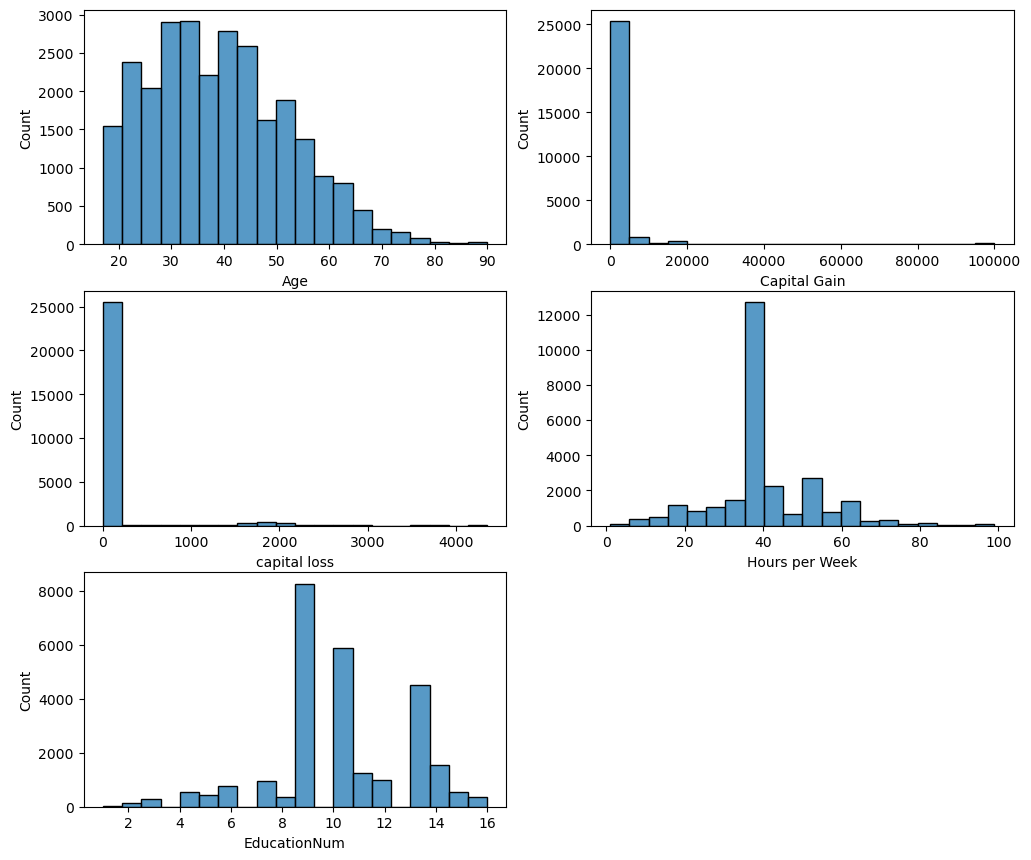

In [137]:
# Plotting numerical features
plt.figure(figsize=(12, 14))
for i, column in enumerate(numerical_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=column, bins=20)
plt.show()

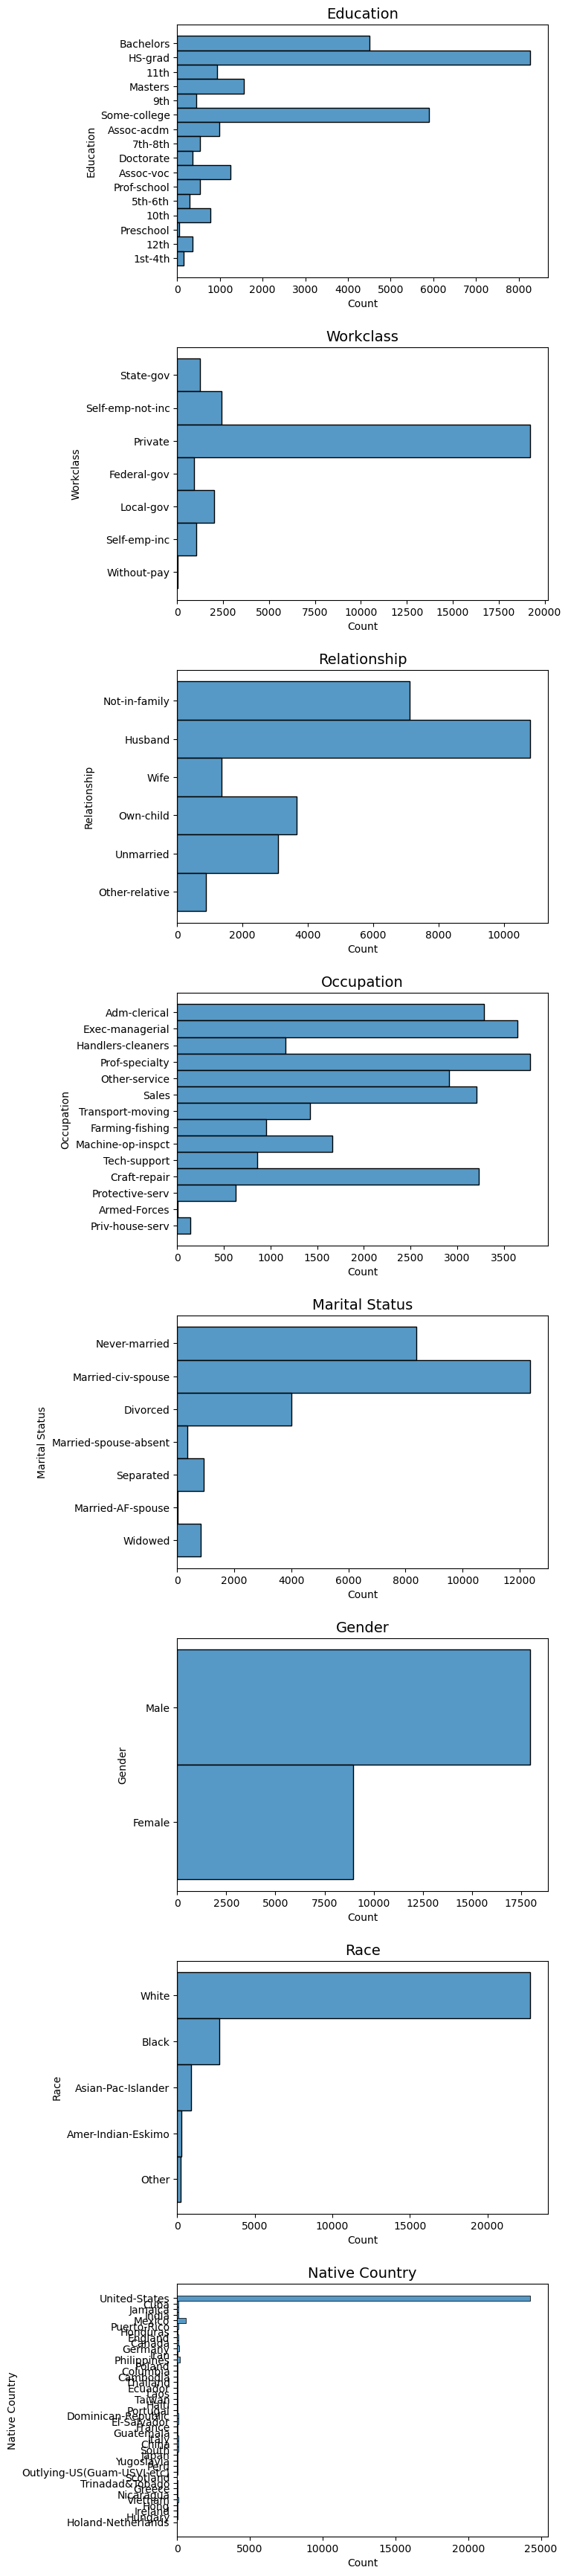

In [139]:
# Now let's make plot's for categorical data
plt.figure(figsize=(8, 35))

for i, column in enumerate(categorical_cols):
    plt.subplot(8, 1, i+1)
    plt.title(column, fontsize=14)
    sns.histplot(data=df, y=column, bins=20)
    plt.tight_layout(pad=2.0)
plt.show()

In [140]:
# Apply log transformation to capital gain and capiral loss, because those features are highly skewed:

df['Capital Gain'] = np.log1p(df['Capital Gain'])
df['Capital Gain'] = np.log1p(df['capital loss'])

df_test['Capital Gain'] = np.log1p(df_test['Capital Gain'])
df_test['capital loss'] = np.log1p(df_test['capital loss'])

In [143]:
# Standartizing numerical features:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) 

print(df.head(10))

        Age         Workclass  Education  EducationNum         Marital Status  \
0 -0.003706         State-gov  Bachelors      1.089942          Never-married   
1  0.830360  Self-emp-not-inc  Bachelors      1.089942     Married-civ-spouse   
2 -0.079530           Private    HS-grad     -0.436743               Divorced   
3  1.057832           Private       11th     -1.200085     Married-civ-spouse   
4 -0.837772           Private  Bachelors      1.089942     Married-civ-spouse   
5 -0.155354           Private    Masters      1.471613     Married-civ-spouse   
6  0.754536           Private        9th     -1.963427  Married-spouse-absent   
7  0.982008  Self-emp-not-inc    HS-grad     -0.436743     Married-civ-spouse   
8 -0.610300           Private    Masters      1.471613          Never-married   
9  0.223766           Private  Bachelors      1.089942     Married-civ-spouse   

          Occupation   Relationship   Race  Gender  Capital Gain  \
0       Adm-clerical  Not-in-family  Whi

In [161]:
education_sorted = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
 '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

In [209]:
# Encoding categorical data:

ohe_categorical_cols = ["Gender", "Race"]
target_categorical_cols = ["Workclass", "Relationship", "Occupation", "Marital Status", "Native Country"]
ordinal_categorical_cols = ["Education"]

ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
ohe_encoded_cols = ohe_encoder.fit_transform(df[ohe_categorical_cols])
ohe_encoded_cols_test = ohe_encoder.transform(df_test[ohe_categorical_cols])

target_encoder = TargetEncoder()
target_encoded_cols = pd.DataFrame(target_encoder.fit_transform(df[target_categorical_cols], df["Income"]), columns=target_categorical_cols)
target_encoded_cols_test = pd.DataFrame(target_encoder.transform(df_test[target_categorical_cols]), columns=target_categorical_cols)

ordinal_encoder = OrdinalEncoder(categories=[education_sorted])
ordinal_encoded_cols = pd.DataFrame(ordinal_encoder.fit_transform(df[ordinal_categorical_cols]), columns=ordinal_categorical_cols)
ordinal_encoded_cols_test = pd.DataFrame(ordinal_encoder.transform(df_test[ordinal_categorical_cols]), columns=ordinal_categorical_cols)

df_encoded = pd.concat(
    [df.drop(columns=categorical_cols), ohe_encoded_cols, target_encoded_cols, ordinal_encoded_cols],
    axis=1
)

df_encoded_test = pd.concat(
    [df_test.drop(columns=categorical_cols), ohe_encoded_cols_test, target_encoded_cols_test, ordinal_encoded_cols_test],
    axis=1
)

print(df_encoded.head(10))
print()
print(df_encoded_test.head(10))

        Age  EducationNum  Capital Gain  capital loss  Hours per Week Income  \
0 -0.003706      1.089942     -0.235824     -0.231413       -0.094321  <=50K   
1  0.830360      1.089942     -0.235824     -0.231413       -2.281159  <=50K   
2 -0.079530     -0.436743     -0.235824     -0.231413       -0.094321  <=50K   
3  1.057832     -1.200085     -0.235824     -0.231413       -0.094321  <=50K   
4 -0.837772      1.089942     -0.235824     -0.231413       -0.094321  <=50K   
5 -0.155354      1.471613     -0.235824     -0.231413       -0.094321  <=50K   
6  0.754536     -1.963427     -0.235824     -0.231413       -2.038177  <=50K   
7  0.982008     -0.436743     -0.235824     -0.231413        0.310649   >50K   
8 -0.610300      1.471613     -0.235824     -0.231413        0.715619   >50K   
9  0.223766      1.089942     -0.235824     -0.231413       -0.094321   >50K   

   Gender_Female  Gender_Male  Race_Amer-Indian-Eskimo  \
0            0.0          1.0                      0.0   
1  